In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Load datasets and check info

In [2]:
train = pd.read_csv('C://Users//hp//Desktop//python2//AmExpert 2019//train.csv')
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


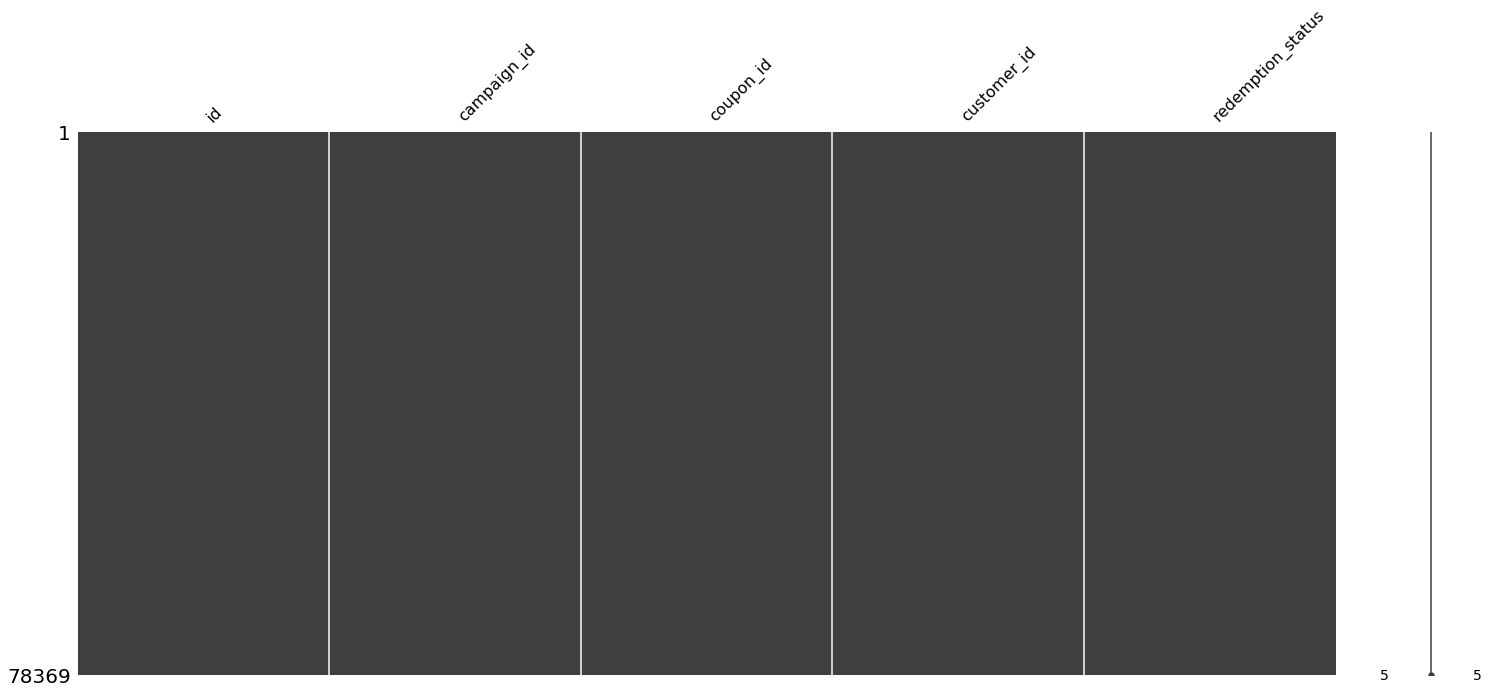

In [4]:
missingno.matrix(train)

In [5]:
train.shape

(78369, 5)

In [6]:
train.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [7]:
train.coupon_id.nunique()

866

In [8]:
campaign = pd.read_csv('C://Users//hp//Desktop//python2//AmExpert 2019//campaign_data.csv')
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [9]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


In [10]:
coupon = pd.read_csv('C://Users//hp//Desktop//python2//AmExpert 2019//coupon_item_mapping.csv')
coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [11]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


In [12]:
transaction = pd.read_csv('C://Users//hp//Desktop//python2//AmExpert 2019//customer_transaction_data.csv')
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [13]:
train.shape

(78369, 5)

In [14]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [15]:
item = pd.read_csv('C://Users//hp//Desktop//python2//AmExpert 2019//item_data.csv')
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [16]:
item.category.unique()

array(['Grocery', 'Miscellaneous', 'Bakery', 'Pharmaceutical',
       'Packaged Meat', 'Seafood', 'Natural Products',
       'Dairy, Juices & Snacks', 'Prepared Food', 'Skin & Hair Care',
       'Meat', 'Travel', 'Flowers & Plants', 'Fuel', 'Salads', 'Alcohol',
       'Garden', 'Restauarant', 'Vegetables (cut)'], dtype=object)

In [17]:
item.shape

(74066, 4)

In [18]:
demograph = pd.read_csv('C://Users//hp//Desktop//python2//AmExpert 2019//customer_demographics.csv')
demograph.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [19]:
demograph.isnull().sum()/760

customer_id       0.000000
age_range         0.000000
marital_status    0.432895
rented            0.000000
family_size       0.000000
no_of_children    0.707895
income_bracket    0.000000
dtype: float64

In [20]:
demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


### Data preprocessing

In [21]:
campaign['start_date'] = pd.to_datetime(campaign['start_date'])
campaign['end_date'] = pd.to_datetime(campaign['end_date'])
#pd.to_datetime(campaign['end_date'])

In [22]:
campaign['duration'] = abs((campaign['end_date'] -  campaign['start_date']).dt.days)

In [23]:
demograph.income_bracket.unique()

array([ 4,  5,  3,  6,  1,  7,  2,  8,  9, 12, 10, 11], dtype=int64)

In [24]:
demograph['marital_status'] = demograph.groupby(['family_size','age_range'])\
['marital_status'].apply(lambda x: x.fillna(x.mode()[0]))

In [25]:
demograph.marital_status.unique()

array(['Married', 'Single'], dtype=object)

In [26]:
demograph.drop('no_of_children',axis=1,inplace=True)

In [27]:
demograph

,customer_id,age_range,marital_status,rented,family_size,income_bracket
0,1,70+,Married,0,2,4
1,6,46-55,Married,0,2,5
2,7,26-35,Married,0,3,3
3,8,26-35,Married,0,4,6
4,10,46-55,Single,0,1,5
5,11,70+,Single,0,2,1
6,12,46-55,Married,0,2,7
7,13,36-45,Single,0,1,2
8,14,26-35,Married,1,2,6
9,15,46-55,Married,0,2,6


### check if balanced set

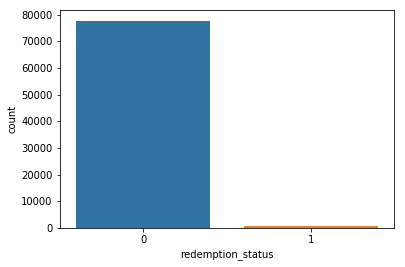

In [28]:
sns.countplot(train.redemption_status)

### Merge dataframes

In [29]:
mtc = pd.merge(train,campaign,on='campaign_id',how='left')
mtc.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,12
1,2,13,116,48,0,X,2013-05-19,2013-05-07,12
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,12
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77


In [30]:
mtc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 9 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null datetime64[ns]
end_date             78369 non-null datetime64[ns]
duration             78369 non-null int64
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 6.0+ MB


In [31]:
mtc.shape

(78369, 9)

In [32]:
mci = pd.merge(coupon,item,on='item_id',how='left')
mci.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [33]:
mci.coupon_id.nunique()

1116

In [34]:
mci.shape

(92663, 5)

In [35]:
mci.groupby('coupon_id').count().reset_index()[['coupon_id','item_id']].head()

,coupon_id,item_id
0,1,39
1,2,2
2,3,17
3,4,24
4,5,7


In [36]:
mci_group = pd.DataFrame()

In [37]:
mci_group[['coupon_id','category_count']] = \
mci.groupby('coupon_id').count().reset_index()[['coupon_id','item_id']]

In [38]:
mci.groupby('coupon_id').max().reset_index().head(10)

,coupon_id,item_id,brand,brand_type,category
0,1,67376,4700,Established,Natural Products
1,2,12901,2084,Established,Grocery
2,3,59346,1558,Established,Grocery
3,4,61353,544,Established,Grocery
4,5,57118,5357,Established,Pharmaceutical
5,6,73879,5395,Local,Seafood
6,7,73853,5452,Local,Vegetables (cut)
7,8,73775,5322,Local,Seafood
8,9,73856,5380,Local,Prepared Food
9,10,43467,4430,Established,Pharmaceutical


In [39]:
mci_group[['brand_type','category']] = \
mci.groupby('coupon_id').max().reset_index()[['brand_type','category']]

In [40]:
mci_group.head()

,coupon_id,category_count,brand_type,category
0,1,39,Established,Natural Products
1,2,2,Established,Grocery
2,3,17,Established,Grocery
3,4,24,Established,Grocery
4,5,7,Established,Pharmaceutical


In [41]:
mci_group.shape

(1116, 4)

In [42]:
#tgroup = transaction.groupby(['customer_id','item_id','date']).sum().reset_index()
tgroup = transaction.groupby(['customer_id']).sum().reset_index()

In [43]:
tgroup.head()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,1,31712801,1227,98513.93,-17030.40,-2116.83
1,2,12698104,474,43100.03,-7051.95,-249.34
2,3,20205585,8163,73050.27,-16013.53,-2179.54
3,4,6180732,280,33973.22,-2927.19,-89.05
4,5,26024517,93353,103615.10,-10817.07,-90.83


In [44]:
tgroup.drop('item_id',axis=1,inplace=True)

In [45]:
tgroup.shape

(1582, 5)

In [46]:
mdtg = pd.merge(tgroup,demograph,on='customer_id',how='outer')
mdtg.head()

,customer_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,income_bracket
0,1,1227,98513.93,-17030.40,-2116.83,70+,Married,0.0,2,4.0
1,2,474,43100.03,-7051.95,-249.34,NaN,NaN,NaN,NaN,NaN
2,3,8163,73050.27,-16013.53,-2179.54,NaN,NaN,NaN,NaN,NaN
3,4,280,33973.22,-2927.19,-89.05,NaN,NaN,NaN,NaN,NaN
4,5,93353,103615.10,-10817.07,-90.83,NaN,NaN,NaN,NaN,NaN


In [47]:
    mdtg.shape

(1582, 10)

In [48]:
mergeddata = pd.merge(mtc,mdtg,on=['customer_id'],how='left')
mergeddata.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,income_bracket
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,12,105551,57120.75,-10282.37,-89.05,46-55,Single,0.0,1,5.0
1,2,13,116,48,0,X,2013-05-19,2013-05-07,12,12143,90185.10,-10664.18,-1237.79,36-45,Married,0.0,2,3.0
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31,1351,117461.66,-17261.79,-2145.72,46-55,Married,0.0,2,7.0
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,12,306,23291.42,-3947.37,-178.10,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77,139063,67797.49,-11534.90,-265.01,46-55,Married,0.0,2,3.0


In [49]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 18 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null datetime64[ns]
end_date             78369 non-null datetime64[ns]
duration             78369 non-null int64
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
age_range            43661 non-null object
marital_status       43661 non-null object
rented               43661 non-null float64
family_size          43661 non-null object
income_bracket       43661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(7), object(4)
memory usage: 11.4+ MB


In [50]:
mergeddata.shape

(78369, 18)

### fill null values

In [51]:
mergeddata['marital_status'].fillna(mergeddata['marital_status'].mode()[0],inplace=True)

In [52]:
mergeddata['age_range'].fillna(mergeddata['age_range'].mode()[0],inplace=True)

In [53]:
mergeddata['family_size'].fillna(mergeddata['family_size'].mode()[0],inplace=True)

In [54]:
mergeddata['rented'].fillna(mergeddata['rented'].mode()[0],inplace=True)

In [55]:
mergeddata['income_bracket'].fillna(mergeddata['income_bracket'].median(),inplace=True)

In [56]:
mergeddata = pd.merge(mergeddata,mci_group,on=['coupon_id'],how='left')
mergeddata.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration,quantity,...,other_discount,coupon_discount,age_range,marital_status,rented,family_size,income_bracket,category_count,brand_type,category
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,12,105551,...,-10282.37,-89.05,46-55,Single,0.0,1,5.0,125,Established,Grocery
1,2,13,116,48,0,X,2013-05-19,2013-05-07,12,12143,...,-10664.18,-1237.79,36-45,Married,0.0,2,3.0,3,Local,Grocery
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31,1351,...,-17261.79,-2145.72,46-55,Married,0.0,2,7.0,67,Established,Pharmaceutical
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,12,306,...,-3947.37,-178.10,46-55,Married,0.0,2,5.0,4,Established,Grocery
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77,139063,...,-11534.90,-265.01,46-55,Married,0.0,2,3.0,32,Established,Grocery


In [57]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 21 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null datetime64[ns]
end_date             78369 non-null datetime64[ns]
duration             78369 non-null int64
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
age_range            78369 non-null object
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null object
income_bracket       78369 non-null float64
category_count       78369 non-null int64
brand_type           78369 non-null object
category          

In [58]:
mergeddata.shape

(78369, 21)

In [59]:
df_numerical=mergeddata._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 13 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
duration             78369 non-null int64
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
rented               78369 non-null float64
income_bracket       78369 non-null float64
category_count       78369 non-null int64
dtypes: float64(5), int64(8)
memory usage: 8.4 MB


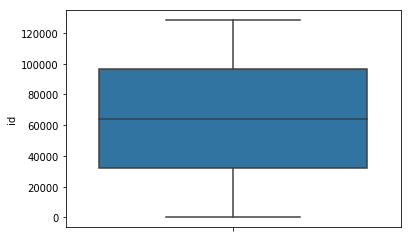

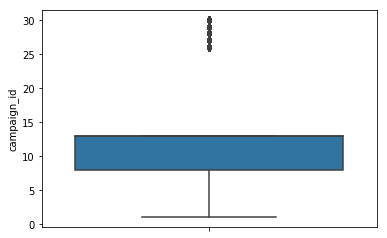

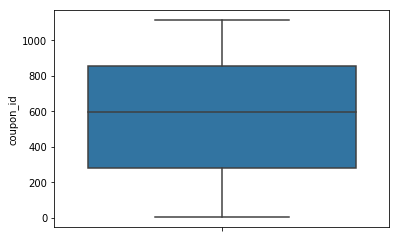

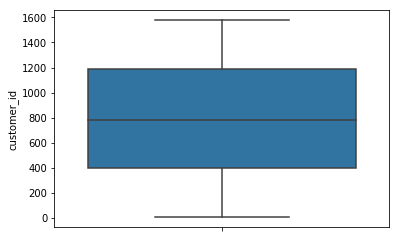

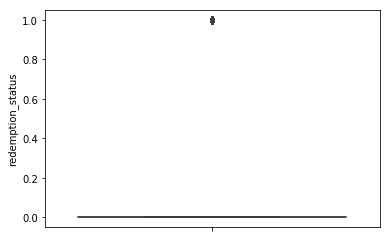

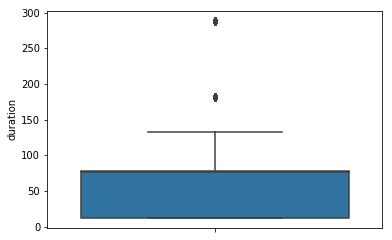

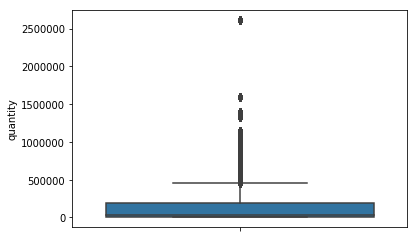

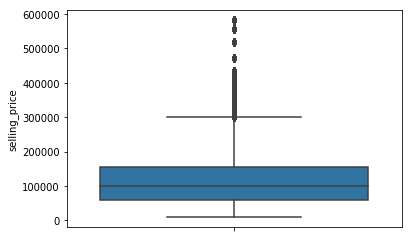

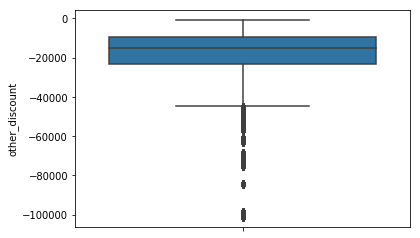

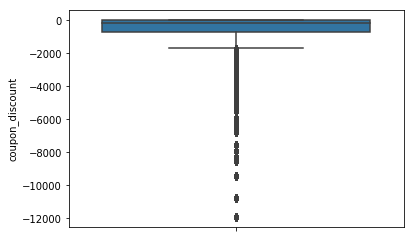

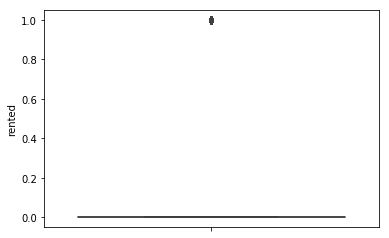

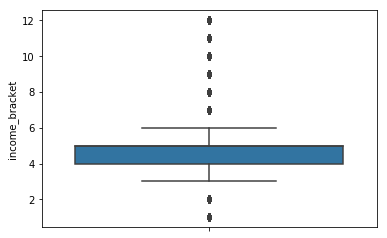

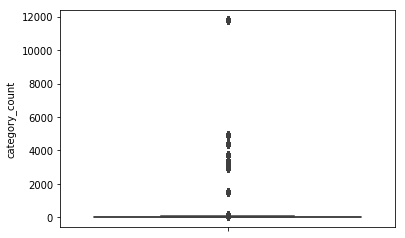

In [60]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.boxplot(y=df_numerical[col], data=mergeddata)
    #sns.distplot(df_numerical[col])

### Label Encoder

In [61]:
lc = LabelEncoder()

In [62]:
mergeddata['age_range'] = lc.fit_transform(mergeddata['age_range'])
mergeddata['family_size'] = lc.fit_transform(mergeddata['family_size'])

In [63]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 21 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null datetime64[ns]
end_date             78369 non-null datetime64[ns]
duration             78369 non-null int64
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
age_range            78369 non-null int32
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null int32
income_bracket       78369 non-null float64
category_count       78369 non-null int64
brand_type           78369 non-null object
category            

In [64]:
item.category.unique()

array(['Grocery', 'Miscellaneous', 'Bakery', 'Pharmaceutical',
       'Packaged Meat', 'Seafood', 'Natural Products',
       'Dairy, Juices & Snacks', 'Prepared Food', 'Skin & Hair Care',
       'Meat', 'Travel', 'Flowers & Plants', 'Fuel', 'Salads', 'Alcohol',
       'Garden', 'Restauarant', 'Vegetables (cut)'], dtype=object)

In [65]:
cat_list = ['Bakery', 'Packaged Meat', 'Seafood', 'Dairy, Juices & Snacks',
            'Prepared Food','Meat','Salads', 'Alcohol','Vegetables (cut)']

In [66]:
def mapCategory(x):
    if x in cat_list:
        return 'consumable'
    else:
        return 'non-consumable'

In [67]:
mergeddata['category'] = mergeddata['category'].apply(mapCategory)

In [68]:
mergeddata['final_price'] = mergeddata['selling_price']+ mergeddata['other_discount'] + mergeddata['coupon_discount']

In [69]:
mergeddata.drop(['selling_price','other_discount','coupon_discount'],axis=1,inplace=True)

In [70]:
mergeddata.income_bracket.unique()

array([ 5.,  3.,  7.,  1.,  4., 10.,  6., 11.,  2.,  8., 12.,  9.])

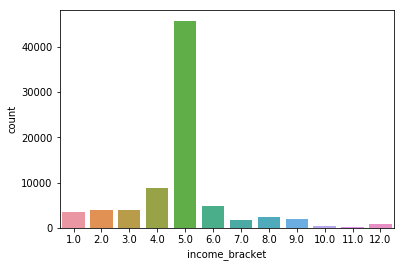

In [71]:
sns.countplot(mergeddata.income_bracket)

In [72]:
def mapIncome(x):
    if (x<4):
        return 'low'
    elif (x>=4 and x<=7):
        return 'middle'
    elif (x>7 and x<=10):
        return 'upper-middle'
    elif (x>10):
        return 'high'

In [73]:
mergeddata['income_bracket'] = mergeddata['income_bracket'].apply(mapIncome)

In [74]:
inc_dict = {'low':1,'middle':2,'upper-middle':3,'high':4}
inc_dict

{'low': 1, 'middle': 2, 'upper-middle': 3, 'high': 4}

In [75]:
mergeddata['income_bracket'] = mergeddata['income_bracket'].map(inc_dict)

In [76]:
mergeddata.redemption_status.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [77]:
dummydata = pd.get_dummies(mergeddata.drop(['redemption_status','coupon_id','customer_id','id','campaign_id','start_date','end_date'],axis=1))
dummydata.head()

,duration,quantity,age_range,rented,family_size,income_bracket,category_count,final_price,campaign_type_X,campaign_type_Y,marital_status_Married,marital_status_Single,brand_type_Established,brand_type_Local,category_consumable,category_non-consumable
0,12,105551,3,0.0,0,2,125,46749.33,1,0,0,1,1,0,0,1
1,12,12143,2,0.0,1,1,3,78283.13,1,0,1,0,0,1,0,1
2,31,1351,3,0.0,1,2,67,98054.15,0,1,1,0,1,0,0,1
3,12,306,3,0.0,1,2,4,19165.95,1,0,1,0,1,0,0,1
4,77,139063,3,0.0,1,1,32,55997.58,1,0,1,0,1,0,0,1


In [78]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 16 columns):
duration                   78369 non-null int64
quantity                   78369 non-null int64
age_range                  78369 non-null int32
rented                     78369 non-null float64
family_size                78369 non-null int32
income_bracket             78369 non-null int64
category_count             78369 non-null int64
final_price                78369 non-null float64
campaign_type_X            78369 non-null uint8
campaign_type_Y            78369 non-null uint8
marital_status_Married     78369 non-null uint8
marital_status_Single      78369 non-null uint8
brand_type_Established     78369 non-null uint8
brand_type_Local           78369 non-null uint8
category_consumable        78369 non-null uint8
category_non-consumable    78369 non-null uint8
dtypes: float64(2), int32(2), int64(4), uint8(8)
memory usage: 7.9 MB


### RobustScaler

In [79]:
rc = RobustScaler()

In [80]:
scaledData = pd.DataFrame(rc.fit_transform(dummydata),columns=dummydata.columns)
scaledData.head()

,duration,quantity,age_range,rented,family_size,income_bracket,category_count,final_price,campaign_type_X,campaign_type_Y,marital_status_Married,marital_status_Single,brand_type_Established,brand_type_Local,category_consumable,category_non-consumable
0,-0.984848,0.403624,0.0,0.0,-1.0,0.0,4.52,-0.413170,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
1,-0.984848,-0.106479,-1.0,0.0,0.0,-1.0,-0.36,-0.030158,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
2,-0.696970,-0.165414,0.0,0.0,0.0,0.0,2.20,0.209982,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.984848,-0.171121,0.0,0.0,0.0,0.0,-0.32,-0.748199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.586634,0.0,0.0,0.0,-1.0,0.80,-0.300840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
mergeddata.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status,duration,quantity,age_range,rented,family_size,income_bracket,category_count,final_price
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,7.836900e+04,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302,66.648713,1.412794e+05,2.684633,0.031964,1.130128,1.946190,81.929003,100069.284694
std,37126.440855,8.019215,329.966054,456.811339,0.095999,53.974676,2.414470e+05,0.969857,0.175906,0.910045,0.506794,605.032516,71412.848715
min,1.000000,1.000000,1.000000,1.000000,0.000000,12.000000,8.800000e+01,0.000000,0.000000,0.000000,1.000000,1.000000,3465.890000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000,12.000000,1.593000e+03,2.000000,0.000000,1.000000,2.000000,5.000000,48243.590000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000,77.000000,3.164100e+04,3.000000,0.000000,1.000000,2.000000,12.000000,80766.090000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000,78.000000,1.847090e+05,3.000000,0.000000,1.000000,2.000000,30.000000,130574.810000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000,289.000000,2.617544e+06,5.000000,1.000000,4.000000,4.000000,11813.000000,529971.400000


In [82]:
x = scaledData
y = mergeddata['redemption_status']

### Model Building

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0)

### LogisticRegression

In [84]:
lr = LogisticRegression()

In [85]:
lr.fit(xtrain,ytrain)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
ypredlr = lor.predict(xtest)

NameError: name 'lor' is not defined

In [ ]:
accuracy_score(ytest,ypredlr)

In [ ]:
yproba_yes = lr.predict_proba(xtest)[:,1]

In [ ]:
roc_auc_score(ytest,yproba_yes)

In [ ]:
print("Classification Report")
print(classification_report(ytest, ypredlr))
accuracy = accuracy_score(ytest, ypredlr)
accuracy

#### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypredrf = rf.predict(xtest)
print(accuracy_score(ytest,ypredrf))
yproba_yes = rf.predict_proba(xtest)[:,1]
roc_auc_score(ytest,yproba_yes)

In [ ]:
print(ypredlr.shape)
print(ypredrf.shape)

In [ ]:
ypredlr

In [ ]:
ypredrf

In [ ]:
print("Classification Report")
print(classification_report(ytest, ypredrf))
accuracy = accuracy_score(ytest, ypredrf)
accuracy

### XGBClassifier

In [ ]:
xg = XGBClassifier()

In [ ]:
xg.fit(xtrain,ytrain)
ypredxg = xg.predict(xtest)
print(accuracy_score(ytest,ypredxg))
yproba_yes = xg.predict_proba(xtest)[:,1]
roc_auc_score(ytest,yproba_yes)

In [ ]:
print("Classification Report")
print(classification_report(ytest, ypredxg))
accuracy = accuracy_score(ytest, ypredxg)
accuracy

### AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()


In [ ]:
ada.fit(xtrain,ytrain)
ypredada = ada.predict(xtest)
print(accuracy_score(ytest,ypredada))
yproba_yes = ada.predict_proba(xtest)[:,1]
roc_auc_score(ytest,yproba_yes)

In [ ]:
print("Classification Report")
print(classification_report(ytest, ypredada))
accuracy = accuracy_score(ytest, ypredada)
accuracy

### GradientBoostingClassifier

In [ ]:
gba = GradientBoostingClassifier()
gba.fit(xtrain,ytrain)
ypredgba = gba.predict(xtest)
print(accuracy_score(ytest,ypredgba))
yproba_yes = gba.predict_proba(xtest)[:,1]
roc_auc_score(ytest,yproba_yes)

In [ ]:
print("Classification Report")
print(classification_report(ytest, ypredgba))
accuracy = accuracy_score(ytest, ypredgba)
accuracy

### GaussianNB

In [ ]:
gb = GaussianNB()
gb.fit(xtrain,ytrain)
ypredgb = gb.predict(xtest)
print(accuracy_score(ytest,ypredgb))
yproba_yes = gb.predict_proba(xtest)[:,1]
roc_auc_score(ytest,yproba_yes)

In [ ]:
print("Classification Report")
print(classification_report(ytest, ypredgb))
accuracy = accuracy_score(ytest, ypredgb)
accuracy

### KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypredkn = gba.predict(xtest)
print(accuracy_score(ytest,ypredkn))
yproba_yes = gba.predict_proba(xtest)[:,1]
roc_auc_score(ytest,yproba_yes)

In [ ]:
print("Classification Report")
print(classification_report(ytest, ypredkn))
accuracy = accuracy_score(ytest, ypredkn)
accuracy

### Applying NearMiss:

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss()

In [ ]:
x_1,y_1 = nm.fit_sample(xtrain.drop(['age_range','rented','campaign_type_Y','marital_status_Single',\
 'category_non-consumable','brand_type_Established','income_bracket'],axis=1),ytrain)

In [ ]:
xtrain_2,xtest_2,ytrain_2,ytest_2 = train_test_split(x_1,y_1,random_state=0)

In [ ]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(xtrain_2,ytrain_2)
ypredrf2 = rf.predict(xtest_2)
print(accuracy_score(ytest_2,ypredrf2))
yproba_yes2 = rf.predict_proba(xtest_2)[:,1]
roc_auc_score(ytest_2,yproba_yes2)

In [ ]:
print("Classification Report")
print(classification_report(ytest_2, ypredrf2))
accuracy = accuracy_score(ytest_2, ypredrf2)
accuracy